In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import spacy
import string
from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob
import textstat
%matplotlib inline
%matplotlib notebook 

In [2]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
data = pd.read_csv('../data/twcs/twcs.csv')

In [4]:
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [6]:
authors = pd.DataFrame({'authors':[i for i in data['author_id'] if i.isalpha()]})

In [7]:
authors['authors'].value_counts().head(20)

AmazonHelp        169840
AppleSupport      106860
SpotifyCares       43265
Delta              42253
Tesco              38573
AmericanAir        36764
TMobileHelp        34317
comcastcares       33031
SouthwestAir       28977
VirginTrains       27817
XboxSupport        24557
sprintcare         22381
sainsburys         19466
GWRHelp            19364
AskPlayStation     19098
ChipotleTweets     18749
VerizonSupport     17966
UPSHelp            17817
ATVIAssist         17650
AskTarget          13218
Name: authors, dtype: int64

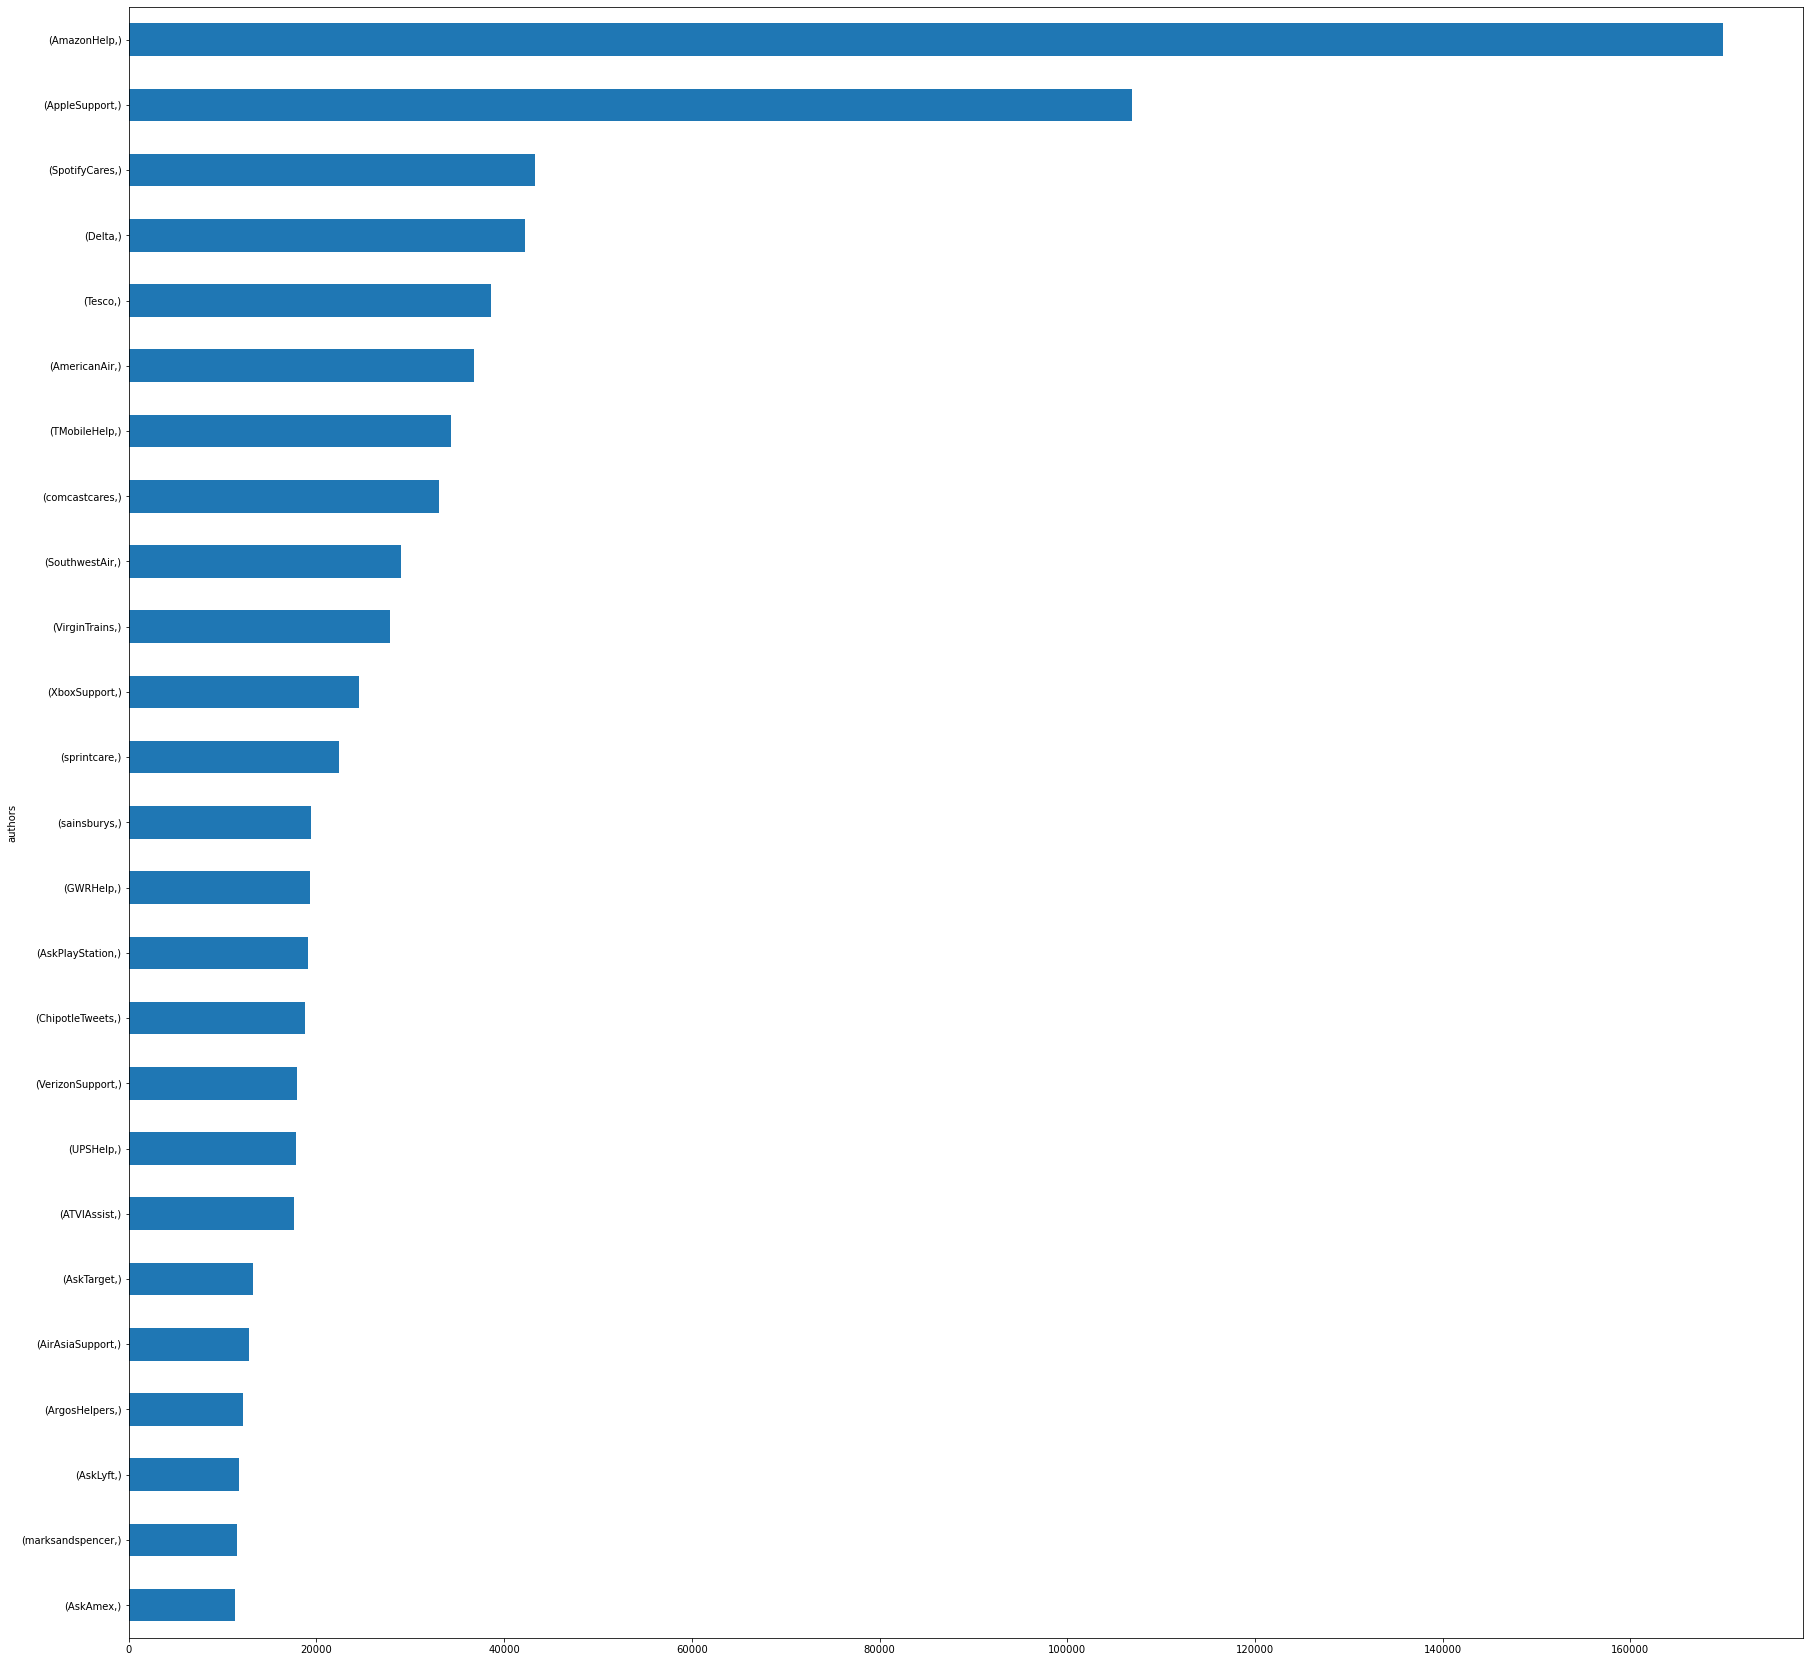

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (30,30))
authors.value_counts().head(25).sort_values().plot(kind = 'barh')
plt.rcParams.update({'font.size': 20})
plt.show()

In [9]:
"""
def sentiment(text):
    text = text.apply(lambda x: x.lower())
    text = text.apply(lambda x: re.sub('\w*\d\w*','', x))
    text = text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
    nlp = spacy.load('en_core_web_sm')
    text = text.apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
    text_combined = ' '.join(text)
    return text_combined
"""

"\ndef sentiment(text):\n    text = text.apply(lambda x: x.lower())\n    text = text.apply(lambda x: re.sub('\\w*\\d\\w*','', x))\n    text = text.apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))\n    nlp = spacy.load('en_core_web_sm')\n    text = text.apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))\n    text_combined = ' '.join(text)\n    return text_combined\n"

In [10]:
def sentiment_value(senti):
    if senti <= -0.35:
        return 'negative'
    elif senti <= 0.33:
        return 'neutral'
    else:
        return 'positive'

In [11]:
delta_reponse = pd.DataFrame(data[((data['author_id'] == 'Delta')  & (data['inbound'] == False))]['text'])
delta_reponse.reset_index(drop = True, inplace = True)

delta_reponse['text'] = delta_reponse['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

delta_reponse['text'] = delta_reponse['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

delta_reponse['text'] = delta_reponse['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
delta_reponse['text'] = delta_reponse['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [12]:
sentiment_analyzer = SentimentIntensityAnalyzer()

def sentiment_analyze(text: str) -> float:
    return sentiment_analyzer.polarity_scores(text)['compound']

In [13]:
# Analyze customer sentiment based on their messages
delta_reponse['sentiment'] = delta_reponse['text'].apply(sentiment_analyze)

In [14]:
delta_reponse['senti_nnp'] = delta_reponse['sentiment'].apply(sentiment_value)
delta_reponse['senti_nnp'] = delta_reponse['sentiment'].apply(sentiment_value)
delta_response_senti_final = delta_reponse.groupby(['senti_nnp']).size()
print(delta_response_senti_final)

senti_nnp
negative     3283
neutral     16756
positive    22214
dtype: int64


In [15]:
print(delta_response_senti_final)

senti_nnp
negative     3283
neutral     16756
positive    22214
dtype: int64


In [16]:
american_air_response = pd.DataFrame(data[((data['author_id'] == 'AmericanAir')  & (data['inbound'] == False))]['text'])
american_air_response.reset_index(drop = True, inplace = True)

american_air_response['text'] = american_air_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

american_air_response['text'] = american_air_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

american_air_response['text'] = american_air_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
american_air_response['text'] = american_air_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


american_air_response['sentiment'] = american_air_response['text'].apply(sentiment_analyze)


american_air_response['senti_nnp'] = american_air_response['sentiment'].apply(sentiment_value)

american_air_response['senti_nnp'] = american_air_response['sentiment'].apply(sentiment_value)
american_air_response_senti_final = american_air_response.groupby(['senti_nnp']).size()

KeyboardInterrupt: 

In [ ]:
print(american_air_response_senti_final)

In [ ]:
southwest_air_response = pd.DataFrame(data[((data['author_id'] == 'SouthwestAir')  & (data['inbound'] == False))]['text'])
southwest_air_response.reset_index(drop = True, inplace = True)

southwest_air_response['text'] = southwest_air_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

southwest_air_response['text'] = southwest_air_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

southwest_air_response['text'] = southwest_air_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
southwest_air_response['text'] = southwest_air_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


southwest_air_response['sentiment'] = southwest_air_response['text'].apply(sentiment_analyze)


southwest_air_response['senti_nnp'] = southwest_air_response['sentiment'].apply(sentiment_value)

southwest_air_response['senti_nnp'] = southwest_air_response['sentiment'].apply(sentiment_value)
southwest_air_response_senti_final = southwest_air_response.groupby(['senti_nnp']).size()

In [ ]:
print(southwest_air_response_senti_final)

In [ ]:
play_station_response = pd.DataFrame(data[((data['author_id'] == 'AskPlayStation')  & (data['inbound'] == False))]['text'])
play_station_response.reset_index(drop = True, inplace = True)

play_station_response['text'] = play_station_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

play_station_response['text'] = play_station_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

play_station_response['text'] = play_station_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
play_station_response['text'] = play_station_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


play_station_response['sentiment'] = play_station_response['text'].apply(sentiment_analyze)


play_station_response['senti_nnp'] = play_station_response['sentiment'].apply(sentiment_value)

play_station_response['senti_nnp'] = play_station_response['sentiment'].apply(sentiment_value)
play_station_response_senti_final = play_station_response.groupby(['senti_nnp']).size()

In [ ]:
print(play_station_response_senti_final)

In [ ]:
chipotle_response = pd.DataFrame(data[((data['author_id'] == 'ChipotleTweets')  & (data['inbound'] == False))]['text'])
chipotle_response.reset_index(drop = True, inplace = True)

chipotle_response['text'] = chipotle_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

chipotle_response['text'] = chipotle_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

chipotle_response['text'] = chipotle_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
chipotle_response['text'] = chipotle_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


chipotle_response['sentiment'] = chipotle_response['text'].apply(sentiment_analyze)


chipotle_response['senti_nnp'] = chipotle_response['sentiment'].apply(sentiment_value)

chipotle_response['senti_nnp'] = chipotle_response['sentiment'].apply(sentiment_value)
chipotle_response_senti_final = chipotle_response.groupby(['senti_nnp']).size()

In [ ]:
print(chipotle_response_senti_final)

In [ ]:
target_response = pd.DataFrame(data[((data['author_id'] == 'AskTarget')  & (data['inbound'] == False))]['text'])
target_response.reset_index(drop = True, inplace = True)

target_response['text'] = target_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

target_response['text'] = target_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

target_response['text'] = target_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
target_response['text'] = target_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


target_response['sentiment'] = target_response['text'].apply(sentiment_analyze)


target_response['senti_nnp'] = target_response['sentiment'].apply(sentiment_value)

target_response['senti_nnp'] = target_response['sentiment'].apply(sentiment_value)
target_response_senti_final = target_response.groupby(['senti_nnp']).size()

In [ ]:
print(target_response_senti_final)

In [ ]:
spotify_response = pd.DataFrame(data[((data['author_id'] == 'SpotifyCares')  & (data['inbound'] == False))]['text'])
spotify_response.reset_index(drop = True, inplace = True)

spotify_response['text'] = spotify_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

spotify_response['text'] = spotify_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

spotify_response['text'] = spotify_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
spotify_response['text'] = spotify_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


spotify_response['sentiment'] = spotify_response['text'].apply(sentiment_analyze)


spotify_response['senti_nnp'] = spotify_response['sentiment'].apply(sentiment_value)

spotify_response['senti_nnp'] = spotify_response['sentiment'].apply(sentiment_value)
spotify_response_senti_final = spotify_response.groupby(['senti_nnp']).size()

In [ ]:
print(spotify_response_senti_final)

In [ ]:
lyft_response = pd.DataFrame(data[((data['author_id'] == 'AskLyft')  & (data['inbound'] == False))]['text'])
lyft_response.reset_index(drop = True, inplace = True)

lyft_response['text'] = lyft_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

lyft_response['text'] = lyft_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

lyft_response['text'] = lyft_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
lyft_response['text'] = lyft_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


lyft_response['sentiment'] = lyft_response['text'].apply(sentiment_analyze)


lyft_response['senti_nnp'] = lyft_response['sentiment'].apply(sentiment_value)

lyft_response['senti_nnp'] = lyft_response['sentiment'].apply(sentiment_value)
lyft_response_senti_final = lyft_response.groupby(['senti_nnp']).size()

In [ ]:
print(lyft_response_senti_final)

In [ ]:
amazon_response = pd.DataFrame(data[((data['author_id'] == 'AmazonHelp')  & (data['inbound'] == False))]['text'])
amazon_response.reset_index(drop = True, inplace = True)

amazon_response['text'] = amazon_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

amazon_response['text'] = amazon_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

amazon_response['text'] = amazon_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
amazon_response['text'] = amazon_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


amazon_response['sentiment'] = amazon_response['text'].apply(sentiment_analyze)


amazon_response['senti_nnp'] = amazon_response['sentiment'].apply(sentiment_value)

amazon_response['senti_nnp'] = amazon_response['sentiment'].apply(sentiment_value)
amazon_response_senti_final = amazon_response.groupby(['senti_nnp']).size()

In [ ]:
print(amazon_response_senti_final)

In [ ]:
apple_response = pd.DataFrame(data[((data['author_id'] == 'AppleSupport')  & (data['inbound'] == False))]['text'])
apple_response.reset_index(drop = True, inplace = True)

apple_response['text'] = apple_response['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

apple_response['text'] = apple_response['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

apple_response['text'] = apple_response['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
apple_response['text'] = apple_response['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


apple_response['sentiment'] = apple_response['text'].apply(sentiment_analyze)


apple_response['senti_nnp'] = apple_response['sentiment'].apply(sentiment_value)

apple_response['senti_nnp'] = apple_response['sentiment'].apply(sentiment_value)
apple_response_senti_final = apple_response.groupby(['senti_nnp']).size()

In [ ]:
print(apple_response_senti_final)

In [ ]:
apple_response.head()

In [ ]:
apple_queries.head()

In [ ]:
delta_queries = []
for i in data['text']:
    if '@Delta' in i:
        delta_queries.append(i)
        
american_air_queries = []
for i in data['text']:
    if '@AmericanAir' in i:
        american_air_queries.append(i)

south_west_air_queries = []
for i in data['text']:
    if '@SouthwestAir' in i:
        south_west_air_queries.append(i)
        
play_station_queries = []
for i in data['text']:
    if '@AskPlayStation' in i:
        play_station_queries.append(i)
        
chipotle_queries = []
for i in data['text']:
    if '@ChipotleTweets' in i:
        chipotle_queries.append(i)
        
target_queries = []
for i in data['text']:
    if '@AskTarget' in i:
        target_queries.append(i)

spotify_queries = []
for i in data['text']:
    if '@SpotifyCares' in i:
        spotify_queries.append(i)
        
lyft_queries = []
for i in data['text']:
    if '@AskLyft' in i:
        lyft_queries.append(i)
        
amazon_queries = []
for i in data['text']:
    if '@AmazonHelp' in i:
        amazon_queries.append(i)
        
apple_queries = []
for i in data['text']:
    if '@AppleSupport' in i:
        apple_queries.append(i)

In [ ]:
delta_queries = pd.DataFrame(delta_queries,columns = ['text'])

american_air_queries = pd.DataFrame(american_air_queries,columns = ['text'])

south_west_air_queries = pd.DataFrame(south_west_air_queries,columns = ['text'])

play_station_queries = pd.DataFrame(play_station_queries,columns = ['text'])

chipotle_queries = pd.DataFrame(chipotle_queries,columns = ['text'])

target_queries = pd.DataFrame(target_queries,columns = ['text'])

spotify_queries = pd.DataFrame(spotify_queries,columns = ['text'])

lyft_queries = pd.DataFrame(lyft_queries,columns = ['text'])

amazon_queries = pd.DataFrame(amazon_queries,columns = ['text'])

apple_queries = pd.DataFrame(apple_queries,columns = ['text'])

In [ ]:
delta_queries['text'] = delta_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

delta_queries['text'] = delta_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

delta_queries['text'] = delta_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
delta_queries['text'] = delta_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

delta_queries['sentiment'] = delta_queries['text'].apply(sentiment_analyze)


delta_queries['senti_nnp'] = delta_queries['sentiment'].apply(sentiment_value)

delta_queries['senti_nnp'] = delta_queries['sentiment'].apply(sentiment_value)
delta_queries_senti_final = delta_queries.groupby(['senti_nnp']).size()

In [ ]:
print(delta_queries_senti_final)

In [ ]:
american_air_queries['text'] = american_air_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

american_air_queries['text'] = american_air_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

american_air_queries['text'] = american_air_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
american_air_queries['text'] = american_air_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

american_air_queries['sentiment'] = american_air_queries['text'].apply(sentiment_analyze)


american_air_queries['senti_nnp'] = american_air_queries['sentiment'].apply(sentiment_value)

american_air_queries['senti_nnp'] = american_air_queries['sentiment'].apply(sentiment_value)
american_air_queries_senti_final = american_air_queries.groupby(['senti_nnp']).size()

In [ ]:
print(american_air_queries_senti_final)

In [ ]:
south_west_air_queries['text'] = south_west_air_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

south_west_air_queries['text'] = south_west_air_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

south_west_air_queries['text'] = south_west_air_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
south_west_air_queries['text'] = south_west_air_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

south_west_air_queries['sentiment'] = south_west_air_queries['text'].apply(sentiment_analyze)


south_west_air_queries['senti_nnp'] = south_west_air_queries['sentiment'].apply(sentiment_value)

south_west_air_queries['senti_nnp'] = south_west_air_queries['sentiment'].apply(sentiment_value)
south_west_air_queries_senti_final = south_west_air_queries.groupby(['senti_nnp']).size()

In [ ]:
print(south_west_air_queries_senti_final)

In [ ]:
play_station_queries['text'] = play_station_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

play_station_queries['text'] = play_station_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

play_station_queries['text'] = play_station_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
play_station_queries['text'] = play_station_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

play_station_queries['sentiment'] = play_station_queries['text'].apply(sentiment_analyze)


play_station_queries['senti_nnp'] = play_station_queries['sentiment'].apply(sentiment_value)

play_station_queries['senti_nnp'] = play_station_queries['sentiment'].apply(sentiment_value)
play_station_queries_senti_final = play_station_queries.groupby(['senti_nnp']).size()

In [ ]:
print(play_station_queries_senti_final)

In [ ]:
chipotle_queries['text'] = chipotle_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

chipotle_queries['text'] = chipotle_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

chipotle_queries['text'] = chipotle_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
chipotle_queries['text'] = chipotle_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

chipotle_queries['sentiment'] = chipotle_queries['text'].apply(sentiment_analyze)


chipotle_queries['senti_nnp'] = chipotle_queries['sentiment'].apply(sentiment_value)

chipotle_queries['senti_nnp'] = chipotle_queries['sentiment'].apply(sentiment_value)
chipotle_queries_senti_final = chipotle_queries.groupby(['senti_nnp']).size()

In [ ]:
print(chipotle_queries_senti_final)

In [ ]:
target_queries['text'] = target_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

target_queries['text'] = target_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

target_queries['text'] = target_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
target_queries['text'] = target_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

target_queries['sentiment'] = target_queries['text'].apply(sentiment_analyze)


target_queries['senti_nnp'] = target_queries['sentiment'].apply(sentiment_value)

target_queries['senti_nnp'] = target_queries['sentiment'].apply(sentiment_value)
target_queries_senti_final = target_queries.groupby(['senti_nnp']).size()

In [ ]:
print(target_queries_senti_final)

In [ ]:
spotify_queries['text'] = spotify_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

spotify_queries['text'] = spotify_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

spotify_queries['text'] = spotify_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
spotify_queries['text'] = spotify_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

spotify_queries['sentiment'] = spotify_queries['text'].apply(sentiment_analyze)


spotify_queries['senti_nnp'] = spotify_queries['sentiment'].apply(sentiment_value)

spotify_queries['senti_nnp'] = spotify_queries['sentiment'].apply(sentiment_value)
spotify_queries_senti_final = spotify_queries.groupby(['senti_nnp']).size()

In [ ]:
print(spotify_queries_senti_final)

In [ ]:
lyft_queries['text'] = lyft_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

lyft_queries['text'] = lyft_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

lyft_queries['text'] = lyft_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
lyft_queries['text'] = lyft_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

lyft_queries['sentiment'] = lyft_queries['text'].apply(sentiment_analyze)


lyft_queries['senti_nnp'] = lyft_queries['sentiment'].apply(sentiment_value)

lyft_queries['senti_nnp'] = lyft_queries['sentiment'].apply(sentiment_value)
lyft_queries_senti_final = lyft_queries.groupby(['senti_nnp']).size()

In [ ]:
print(lyft_queries_senti_final)

In [ ]:
amazon_queries['text'] = amazon_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

amazon_queries['text'] = amazon_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

amazon_queries['text'] = amazon_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
amazon_queries['text'] = amazon_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

amazon_queries['sentiment'] = amazon_queries['text'].apply(sentiment_analyze)


amazon_queries['senti_nnp'] = amazon_queries['sentiment'].apply(sentiment_value)

amazon_queries['senti_nnp'] = amazon_queries['sentiment'].apply(sentiment_value)
amazon_queries_senti_final = amazon_queries.groupby(['senti_nnp']).size()

In [ ]:
print(amazon_queries_senti_final)

In [ ]:
apple_queries['text'] = apple_queries['text'].apply(lambda x: x.lower())

# Eliminate digits in the text using regular expressions

apple_queries['text'] = apple_queries['text'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Eliminate punctuaitons

apple_queries['text'] = apple_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# use spacy module
#nlp = spacy.load('en_core_web_sm')

# stopwords removal and lemmatization
apple_queries['text'] = apple_queries['text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

apple_queries['sentiment'] = apple_queries['text'].apply(sentiment_analyze)


apple_queries['senti_nnp'] = apple_queries['sentiment'].apply(sentiment_value)

apple_queries['senti_nnp'] = apple_queries['sentiment'].apply(sentiment_value)
apple_queries_senti_final = apple_queries.groupby(['senti_nnp']).size()

In [ ]:
print(apple_queries_senti_final)

In [ ]:
delta_text_combined = ' '.join(delta_queries[delta_queries['senti_nnp'] == 'positive']['text'])
delta_text_combined = delta_text_combined.replace('Delta', "").replace("delta", "").replace("httpstco", "").replace("https", "")
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(delta_text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
delta_positive_words = delta_text_combined.split(" ")
delta_positive_words = pd.DataFrame({'words' : delta_positive_words})
delta_positive_words['words'].value_counts().head(20)

In [ ]:
south_west_air_text_combined = ' '.join(south_west_air_queries[south_west_air_queries['senti_nnp'] == 'positive']['text'])
south_west_air_text_combined = south_west_air_text_combined.replace('southwestair', "").replace("southwest", "").replace("httpstco", "").replace("https", "")
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(south_west_air_text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
#plt.show()
plt.savefig('southwest_air_positive_queries.png')

In [ ]:
south_west_air_positive_words = south_west_air_text_combined.split(" ")
south_west_air_positive_words = pd.DataFrame({'words' : south_west_air_positive_words})
south_west_air_positive_words['words'].value_counts().head(30)

In [ ]:
apple_text_combined = ' '.join(apple_queries[apple_queries['senti_nnp'] == 'negative']['text'])
apple_text_combined = apple_text_combined.replace('applesupport', "").replace("apple", "").replace("problem", "").replace("https", "")
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(apple_text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('apple_negative_queries.png')

In [ ]:
apple_negative_words = apple_text_combined.split(" ")
apple_negative_words = pd.DataFrame({'words' : apple_negative_words})
apple_negative_words['words'].value_counts().head(30)

#apple_queries['text'] = apple_queries['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
apple_res_text_combined = ' '.join(apple_response[apple_response['senti_nnp'] == 'positive']['text'])
apple_res_text_combined = apple_res_text_combined.replace('httpstco', "")#.replace("apple", "").replace("problem", "").replace("https", "")
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(apple_res_text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [ ]:
apple_res_text_combined = ' '.join(apple_response[apple_response['senti_nnp'] == 'negative']['text'])
apple_res_text_combined = apple_res_text_combined.replace('httpstco', "")#.replace("apple", "").replace("problem", "").replace("https", "")
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(apple_res_text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [ ]:
chipotle_text_combined = ' '.join(chipotle_queries[chipotle_queries['senti_nnp'] == 'negative']['text'])
chipotle_text_combined = chipotle_text_combined.replace('chipotletweet', "").replace("httpstco", "").replace("chipotle", "").replace("https", "")
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(chipotle_text_combined)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('chipotle_negative_queries.png')

In [ ]:
chipotle_negative_words = chipotle_text_combined.split(" ")
chipotle_negative_words = pd.DataFrame({'words' : chipotle_negative_words})
chipotle_negative_words['words'].value_counts().head(30)